In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Read the data:

In [2]:
customer=pd.read_csv('Customers.csv')
product=pd.read_csv('Products.csv')
transaction=pd.read_csv('Transactions.csv')

In [3]:
customer.head(3)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07


In [4]:
product.head(3)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12


In [5]:
transaction.head(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
customer_transactions = pd.merge(transaction, customer, on="CustomerID", how="inner")
df= pd.merge(customer_transactions, product, on="ProductID", how="inner")

In [7]:
df.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68


### Data description

**TransactionID**: Unique identifier for each transaction.

**CustomerID**: Unique identifier for each customer who made the transaction.

**ProductID**: Unique identifier for each product sold in the transaction.

**TransactionDate**: Date when the transaction occurred.

**CustomerName**: Name of the customer who made the transaction.

**Region**: Continent where the customer resides.

**SignupDate**: Date when the customer signed up on the platform.

**ProductName**: Name of the product sold in the transaction.

**Category**: Category of the product sold.

**Price**: Price of the product sold in USD.

**Quantity**: Quantity of the product purchased.

**TotalValue**: Total value of the transaction.

### Droping Unwanted column

In [8]:
df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')

In [9]:
df['Price_x']==df['Price_y']

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Length: 1000, dtype: bool

In [10]:
df.drop('Price_x',axis=1,inplace=True)

In [11]:
df.rename({'Price_y':'Price'},axis=1,inplace=True)

In [12]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


### Basic Analysis

In [13]:
df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price              0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   CustomerName     1000 non-null   object 
 7   Region           1000 non-null   object 
 8   SignupDate       1000 non-null   object 
 9   ProductName      1000 non-null   object 
 10  Category         1000 non-null   object 
 11  Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [15]:
#changing the datatype for Transcation date and SignupDate
df['TransactionDate']=pd.to_datetime(df['TransactionDate'])
df['SignupDate']=pd.to_datetime(df['SignupDate'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   CustomerName     1000 non-null   object        
 7   Region           1000 non-null   object        
 8   SignupDate       1000 non-null   datetime64[ns]
 9   ProductName      1000 non-null   object        
 10  Category         1000 non-null   object        
 11  Price            1000 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 93.9+ KB


### Data Visuvalization

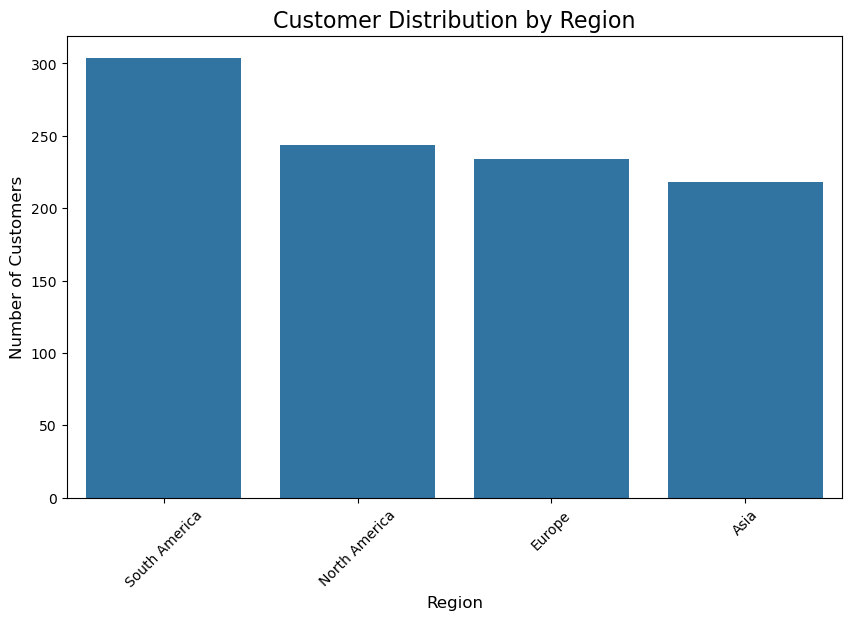

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Region', order=df['Region'].value_counts().index)
plt.title('Customer Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

* South america got highest number of customers followed by North america, Europe and asia

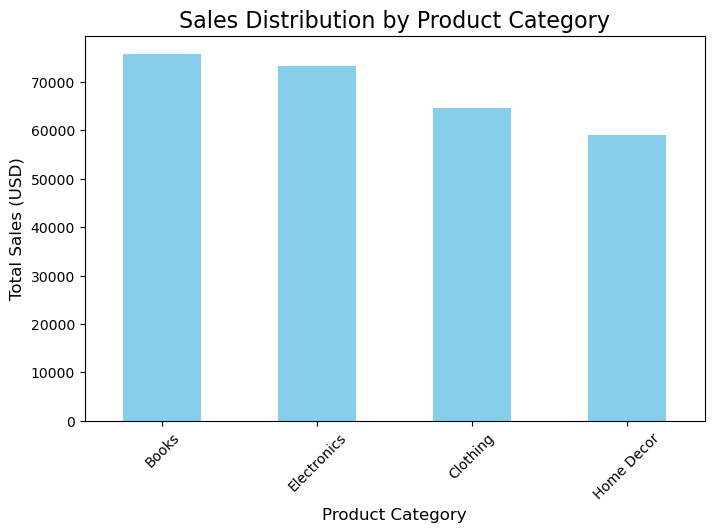

In [18]:
category_sales = df.groupby('Category')['Price'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Distribution by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

* Books and electronics are among the best-selling items.These two categories are leading sources of revenue for the company.
* Clothing and home decor trail behind but Still very good money-earners, they don't quite match the books and electronics in terms of sales.

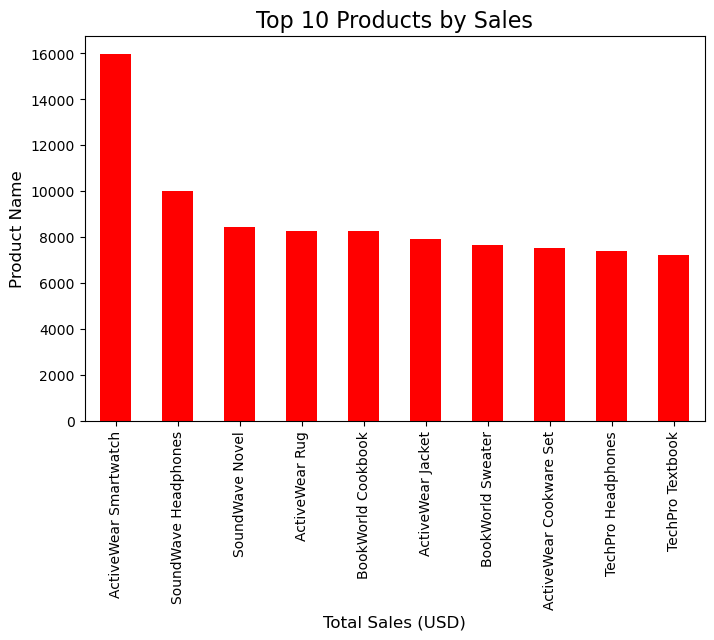

In [19]:
product_sales = df.groupby('ProductName')['Price'].sum().sort_values(ascending=False).head(10)

# Horizontal bar plot
plt.figure(figsize=(8, 5))
product_sales.plot(kind='bar', color='red')
plt.title('Top 10 Products by Sales', fontsize=16)
plt.xlabel('Total Sales (USD)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

* ActiveWear Smartwatch is the one that is outperforming its competitors, indicating great customer demand and further potential growth.
* SoundWave Headphones and ActiveWear Novel are also sell well, which indicates huge audio product and book demand for the ActiveWear brand.

* Diverse product categories are represented. There are products in the top 10 from different categories like electronics, clothing, home goods, and books, which generally indicates a balanced portfolio of products.

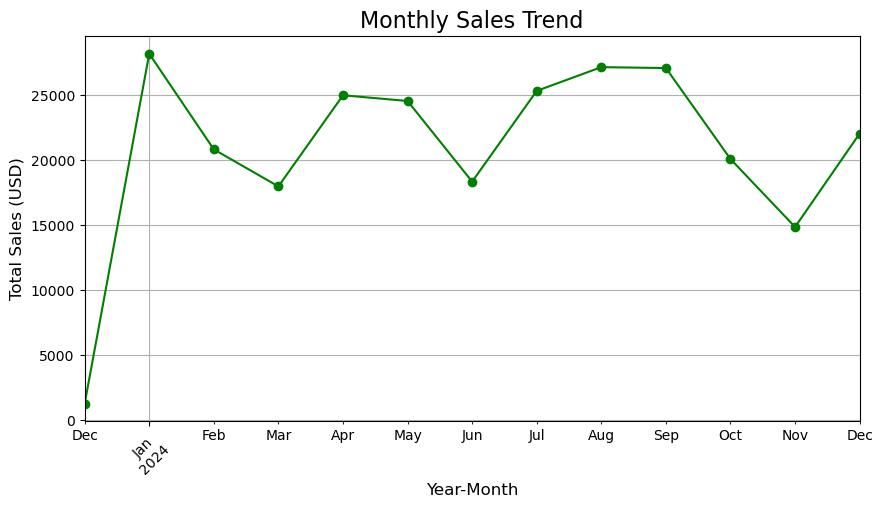

In [20]:
df['TransactionMonth'] = df['TransactionDate'].dt.to_period('M')

monthly_sales = df.groupby('TransactionMonth')['Price'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

* The chart shows a significant jump in sales during January 2024, reaching the highest point of the year.
  
* After the peak in January, sales experience a decline and then fluctuate throughout the year, with Augest and September showing higher sales than others.
  
* December sales seem to be on the rise again, suggesting a possible upward trend at the end of the year.

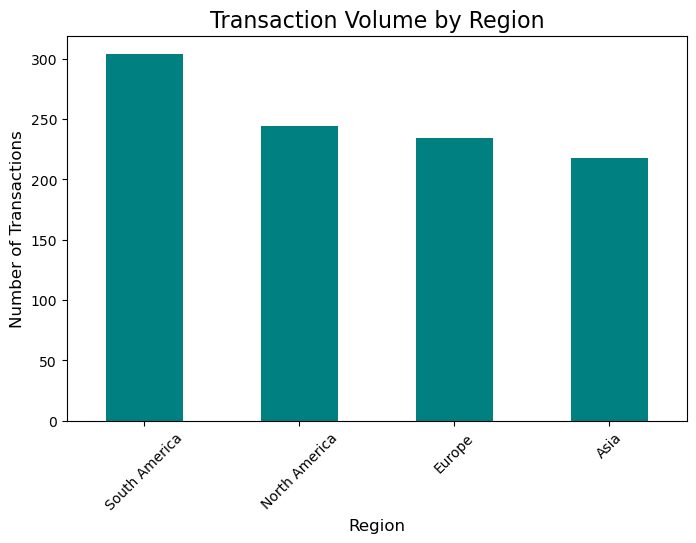

In [21]:
region_transactions = df.groupby('Region')['TransactionID'].count().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
region_transactions.plot(kind='bar', color='teal')
plt.title('Transaction Volume by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.show()

* The chart reveals that South America has the highest transaction volume among the regions , with a significant lead over the others. This suggests a strong market presence and demand for the product or service in South America.

* North America and Europe show comparable transaction volumes, indicating a relatively balanced market share in these regions.

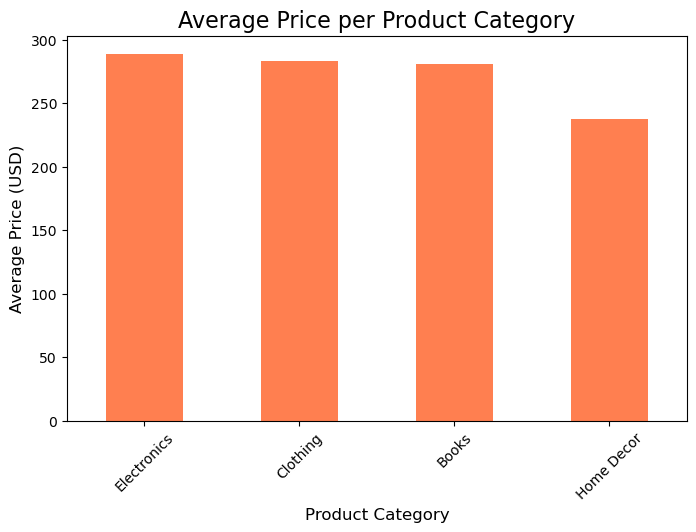

In [22]:
avg_price_category = df.groupby('Category')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
avg_price_category.plot(kind='bar', color='coral')
plt.title('Average Price per Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [23]:
time_series_data = df.groupby('TransactionDate')['Price'].sum().reset_index()

time_series_data.set_index('TransactionDate', inplace=True)
time_series_data.head()

,Price
TransactionDate,
2023-12-30 15:29:12,156.96
2023-12-31 03:27:43,239.70
2023-12-31 06:53:54,396.34
2023-12-31 15:44:04,455.72
2024-01-01 03:54:19,147.95


Text(0.5, 0, 'Month')

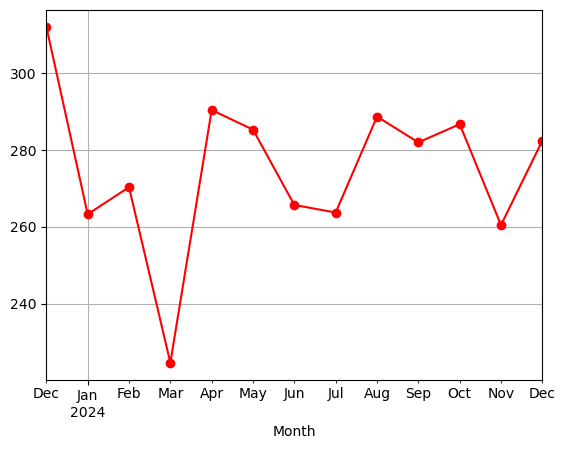

In [24]:
time_series_data.resample(rule='M').mean()['Price'].plot(c='red',marker='o')
plt.grid()
plt.xlabel('Month')

* A line plot to visualize the trend of these average monthly prices.

* The price shows notable fluctuations, starting high in December 2023, dropping sharply in January 2024, peaking in May 2024, and declining with minor variations until November 2024 before a slight rise in December 2024.
*  Seasonality is evident, with the January drop likely due to post-holiday sales or reduced demand, while the mid-year peak may stem from increased demand or new launches.
*  The year-end decline could reflect holiday shopping or inventory adjustments.
